# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [59]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

# 2. Collect and load data

In [60]:
df= pd.read_csv('bigcity.csv')
df.set_index('Unnamed: 0',inplace=True)

# 3. Explore numeric variables - five number summary

In [61]:
for i in df.columns:
    print('Five Point summary for column',i,': Minimum value -',df[i].min())
    print('Five Point summary for column',i,': 25 percentile -',df[i].quantile(0.25).round(2))
    print('Five Point summary for column',i,': Median -',np.median(df[i]))
    print('Five Point summary for column',i,': 75 percentile -',df[i].quantile(0.75).round(2))
    print('Five Point summary for column',i,': Maximum value -',df[i].max())

Five Point summary for column u : Minimum value - 2
Five Point summary for column u : 25 percentile - 43.0
Five Point summary for column u : Median - 64.0
Five Point summary for column u : 75 percentile - 120.0
Five Point summary for column u : Maximum value - 507
Five Point summary for column x : Minimum value - 46
Five Point summary for column x : 25 percentile - 58.0
Five Point summary for column x : Median - 79.0
Five Point summary for column x : 75 percentile - 130.0
Five Point summary for column x : Maximum value - 634


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

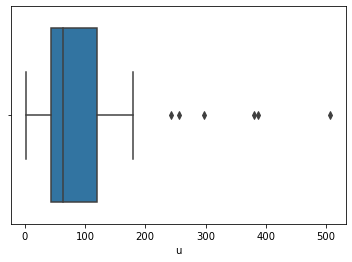

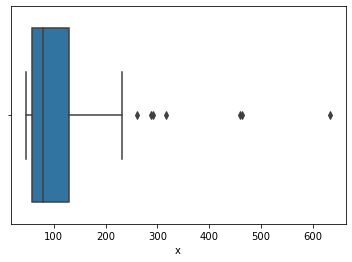

In [62]:
# Checking for outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

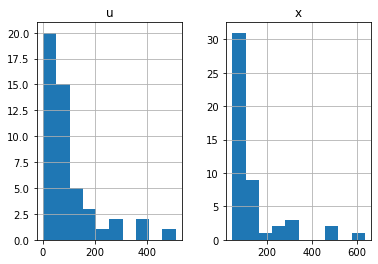

In [63]:
df.hist()
plt.show()

In [64]:
std=np.std(df)
var = std **2
std,var

(u    103.334211
 x    121.858396
 dtype: float64,
 u    10677.959184
 x    14849.468555
 dtype: float64)

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

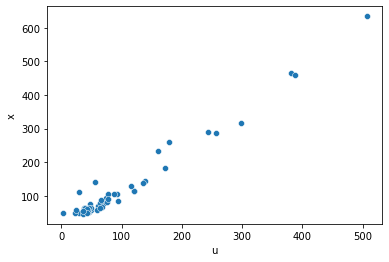

In [65]:
sns.scatterplot(df['u'],df['x'])
plt.show()

In [66]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [67]:
df.skew()
df['u'] = np.log(df['u'])
df['x'] = np.log(df['x'])
df.skew()
df['x'] = np.log(df['x'])
df.skew()

u   -0.685796
x    0.974176
dtype: float64

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [68]:
df.corr()

,u,x
u,1.000000,0.847625
x,0.847625,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

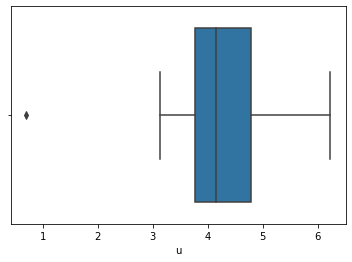

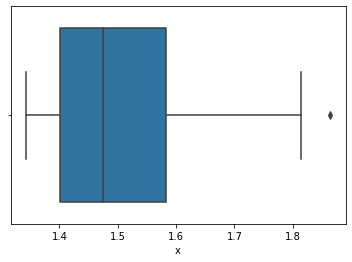

In [69]:
# Checking for outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [70]:
col=df.columns
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+ 1.5*iqr
    lb=q1-1.5*iqr
    uc=df[i].quantile(0.99).round()
    lc=df[i].quantile(0.01).round()
    ind1=df[df[i] > ub].index
    ind2=df[df[i] < lb].index
    df.loc[ind1,i]=uc
    df.loc[ind2,i]=lc

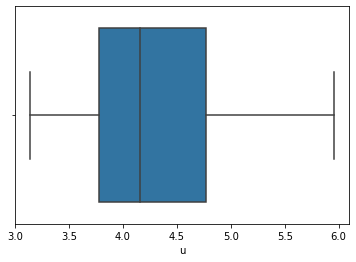

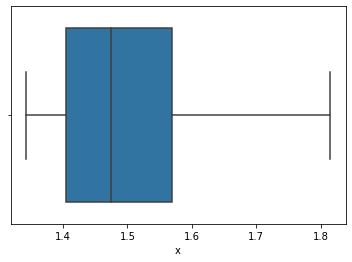

In [94]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [84]:
df.max(),df.min()
ind1=df[df['u']==2].index
ind2=df[df['x']==df['x'].max()].index
df.drop(index=ind1,inplace=True)

In [85]:
df.drop(index=ind2,inplace=True)

In [86]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
num_df_sc=sc.fit_transform(df)
num_df_sc=pd.DataFrame(df,columns=df.columns)

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [147]:
x =df.drop(columns='x')
y =df['x']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=100)
print('shape of xtrain',xtrain.shape )
print('shape of xtest',xtest.shape )
print('shape of ytrain',ytrain.shape )
print('shape of ytest',ytest.shape )
print('Shape of Dataset',df.shape)

shape of xtrain (37, 1)
shape of xtest (10, 1)
shape of ytrain (37,)
shape of ytest (10,)
Shape of Dataset (47, 2)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [148]:
from statsmodels import api
xc= sm.add_constant(x)
ols_model =  api.OLS(ytrain,xtrain)
linear_model = ols_model.fit()
y_pred_train=linear_model.predict(xtrain)
y_pred_test= linear_model.predict(xtest)
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              4845.
Date:                Tue, 28 Dec 2021   Prob (F-statistic):                    5.54e-40
Time:                        13:42:01   Log-Likelihood:                          22.975
No. Observations:                  37   AIC:                                     -43.95
Df Residuals:                      36   BIC:                                     -42.34
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
u              0.3464      0.005     69.603      0.000       0.336       0.357
==============================================================================
Omnibus:                        3.437   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                2.159
Skew:                           0.499   Prob(JB):                        0.340
Kurtosis:                       3.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

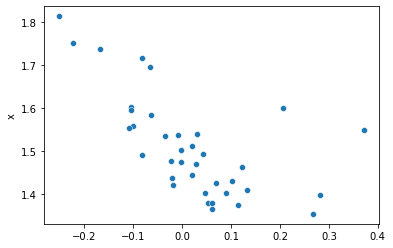

In [149]:
sns.scatterplot(linear_model.resid,df['x'])
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [150]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
train_mae= mean_absolute_error(ytrain,y_pred_train)
train_mse= mean_squared_error(ytrain,y_pred_train)
test_mae= mean_absolute_error(ytest,y_pred_test)
test_mse= mean_squared_error(ytest,y_pred_test)
train_mse,test_mse,train_mae,test_mae

(0.01691168543815337,
 0.02450381302523145,
 0.09684651913744755,
 0.14543584440303284)

In [145]:
r2_score(ytrain,y_pred_train),r2_score(ytest,y_pred_test)

(-0.2134425587184181, 0.20349259679247977)

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [151]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain),lr.score(xtest,ytest)

(0.8010007733586224, 0.9551300390773122)